# load mmm samples

In [1]:
%include "EnableIPythonDisplay.swift"

import PythonKit
import Foundation

let np = Python.import("numpy")
let plt = Python.import("matplotlib.pyplot")
IPythonDisplay.shell.enable_matplotlib("inline")

%include "Sources/MotionDataset/MotionFrame.swift"
%include "Sources/MotionDataset/MotionSample.swift"
%include "Sources/MotionDataset/MotionDataset.swift"

In [2]:
// TODO: create api for saving the image

In [3]:
let mmmURL = URL(fileURLWithPath: "/notebooks/m2l.gt/data/2017-06-22/00003_mmm.xml")
let annotationsURL = URL(fileURLWithPath: "/notebooks/m2l.gt/data/2017-06-22/00003_annotations.json")
let motionSample = MotionSample(mmmURL: mmmURL, annotationsURL: annotationsURL)
print(motionSample.describe())

MotionSample(timestamp: 5.68, motions: 569, annotations: 1)


In [4]:
print(motionSample.annotations)

["A human walking"]


In [5]:
// + create class that loads dataset 
// TODO: and converts it
// + generate n_max mmm and annotations filenames
// + load MotionSample
// TODO: make it faster

In [6]:
let datasetFolderURL = URL(fileURLWithPath: "/notebooks/m2l.gt/data/2017-06-22/")
var motionDataset = MotionDataset(datasetFolderURL: datasetFolderURL, maxSamples: 10)

1, 00001_mmm.xml, 00001_annotations.json
2, 00002_mmm.xml, 00002_annotations.json
3, 00003_mmm.xml, 00003_annotations.json
4, 00004_mmm.xml, 00004_annotations.json
5, 00005_mmm.xml, 00005_annotations.json
6, 00006_mmm.xml, 00006_annotations.json
7, 00007_mmm.xml, 00007_annotations.json
8, 00008_mmm.xml, 00008_annotations.json
9, 00009_mmm.xml, 00009_annotations.json
10, 00010_mmm.xml, 00010_annotations.json


In [7]:
print(motionDataset.describe())

MotionDataset(motionSamples: 10)


In [8]:
// TODO: pad/clip motions to maxTimestep

In [9]:
for motionSample in motionDataset.motionSamples {
    print(motionSample.describe())
}

MotionSample(timestamp: 3.77, motions: 378, annotations: 1)
MotionSample(timestamp: 5.3, motions: 531, annotations: 1)
MotionSample(timestamp: 5.68, motions: 569, annotations: 1)
MotionSample(timestamp: 5.65, motions: 566, annotations: 2)
MotionSample(timestamp: 5.88, motions: 589, annotations: 1)
MotionSample(timestamp: 6.15, motions: 616, annotations: 2)
MotionSample(timestamp: 5.79, motions: 580, annotations: 2)
MotionSample(timestamp: 6.19, motions: 620, annotations: 1)
MotionSample(timestamp: 6.29, motions: 630, annotations: 3)
MotionSample(timestamp: 6.23, motions: 624, annotations: 1)


# visualize sample

In [10]:
let time = np.array(motionSample.motionFrames.map {$0.timestamp})
let position = np.array(motionSample.motionFrames.map {$0.jointPositions})

In [11]:
position.shape

(569, 45)


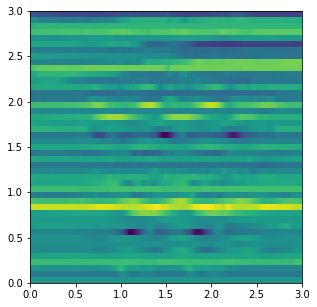

None


In [12]:
plt.figure(figsize: [5, 5])
plt.imshow(position.T, interpolation: "nearest", extent: [0, 3, 0, 3], cmap: "viridis")
plt.show()

# group joints into sections of skeleton

MotionSample(timestamp: 3.77, motions: 378, annotations: 1)
["A person is walking forwards."]
MotionSample(timestamp: 5.3, motions: 531, annotations: 1)
["A person walks 4 steps forward."]
MotionSample(timestamp: 5.68, motions: 569, annotations: 1)
["A human walking"]
MotionSample(timestamp: 5.65, motions: 566, annotations: 2)
["A person walks forward at medium speed.", "human slowly goes forward"]
MotionSample(timestamp: 5.88, motions: 589, annotations: 1)
["A human walks four slow steps forward"]
MotionSample(timestamp: 6.15, motions: 616, annotations: 2)
["A person goes four and half steps forward.", "A person walking forward slightly to the right."]
MotionSample(timestamp: 5.79, motions: 580, annotations: 2)
["A person walks slowly for four steps and stops.", "A person walks four steps to the forward direction."]
MotionSample(timestamp: 6.19, motions: 620, annotations: 1)
["A person walks slowly 4 steps forward."]
MotionSample(timestamp: 6.29, motions: 630, annotations: 3)
["A pers

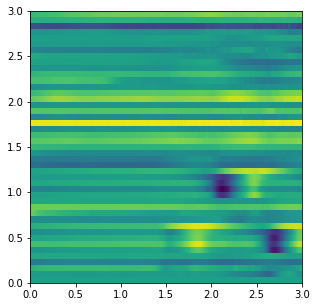

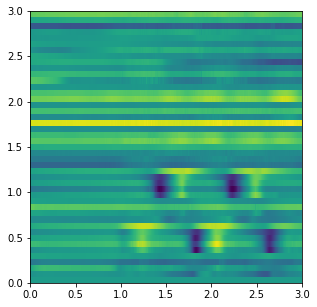

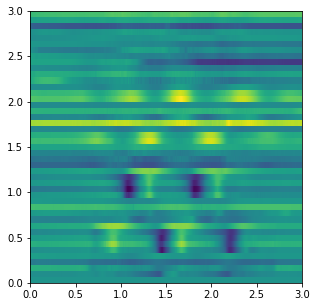

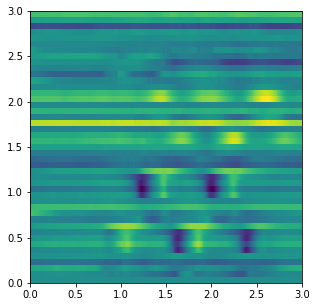

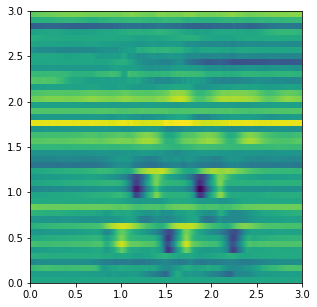

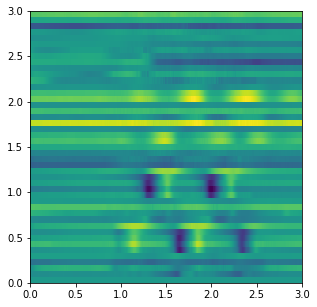

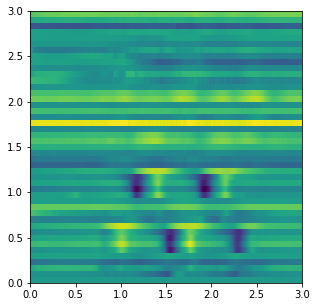

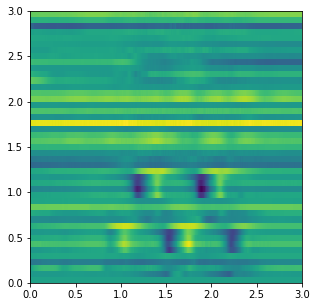

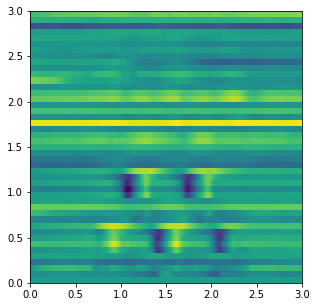

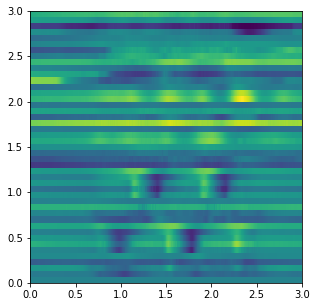

In [13]:
for motionSample in motionDataset.motionSamples {
    print(motionSample.describe())
    print(motionSample.annotations)
    let groupedPosition = np.array(motionSample.motionFrames.map {$0.grouppedJointPositions()})
    plt.figure(figsize: [5, 5])
    plt.imshow(groupedPosition.T, interpolation: "nearest", extent: [0, 3, 0, 3], cmap: "viridis")
    plt.show()
}